In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


def custom_fun(elem):
    return(elem[1])

def custom_clust(elem):
    return(elem[1])
 
file1 = pd.read_csv('soc-redditHyperlinks-body.tsv',delimiter = '\t')

u_source = file1['SOURCE_SUBREDDIT'].unique().tolist()
u_target = file1['TARGET_SUBREDDIT'].unique().tolist()
u_source.extend(u_target)
Vertices_list = list(dict.fromkeys(u_source))
Vertices_list.sort()

In [4]:
Edges_list = list(zip(file1['SOURCE_SUBREDDIT'],file1['TARGET_SUBREDDIT']))
len(Edges_list)


Edges_list.sort()
Edges_unique = list(dict.fromkeys(Edges_list))


V = len(Vertices_list)

# initiate V*V matrix with all zeros
Adj_Mat = np.zeros((V,V),dtype=int)

Adj_list=[]
Length_list=[]
#initiate list 
for s in range(V):
    Adj_list.append([])

G = nx.DiGraph()
 
for i in Edges_unique:
    a=Vertices_list.index(i[0])
    b=Vertices_list.index(i[1])
    Adj_Mat[a][b]=1
    Adj_list[a].append(i[1])
    G.add_edge(i[0],i[1],relation='friend')

In [5]:
count_vertex = 0
count = []
for i in range(len(Adj_list)):
    count_vertex = len(Adj_list[i])
    a = [Vertices_list[i],count_vertex]
    count.append(a)
count.sort(key=custom_fun,reverse=True)

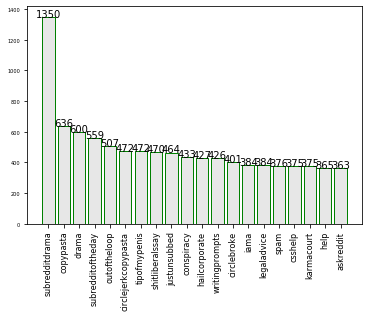

In [6]:
labels = []
sizes = []
for i in range(20):
    labels.append(count[i][0])
    sizes.append(count[i][1]) 

plt.rc('xtick',labelsize=5)
plt.rc('ytick',labelsize=5)
plt.xticks(
    rotation=90, 
    fontweight='light',
    fontsize=8 
    )
    
plt.bar(labels,sizes,color=(0.1, 0.1, 0.1, 0.1),edgecolor='green')

for i,j in zip(labels,sizes):
    plt.text(i,j,str(j),horizontalalignment='center')

plt.rcParams["figure.figsize"] = (20,3)
plt.show()

#fig.savefig('final_body_1.png')

In [7]:
#print(nx.is_connected(G))
#print(nx.number_connected_components(G))
#list2 = []
#ist2 = (list(nx.connected_components(G)))
#argest_con = max(nx.connected_components(G),key=len)
#rint (len(largest_con))
#rint(largest_con)
#ist3 = []
#ist3=[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
#rint(list3[1])
#nx.draw_networkx(list2[0])
#plt.show()

#nx.draw_networkx(make_max_clique_graph(G, create_using=None))
#plt.show()

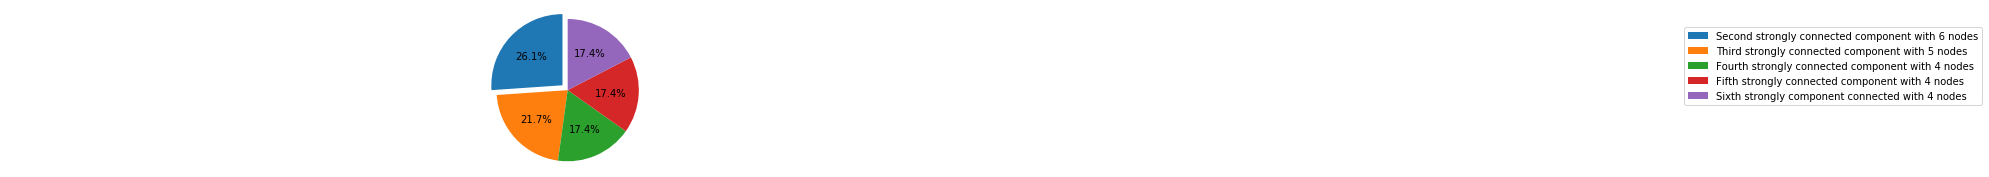

In [8]:
[len(c) for c in sorted(nx.strongly_connected_components(G),
                         key=len, reverse=True)]
list3 = []
list4 = []

list3=list(max(nx.strongly_connected_components(G),key=len))
list4=list(nx.strongly_connected_components(G))
list4.sort(key=len,reverse=True)

labels = []
values = []
 

for x in range(5):                    
                lenx = len(list4[x+1])
                values.append(lenx)
                
pielabels = ['Second strongly connected component with 6 nodes','Third strongly connected component with 5 nodes','Fourth strongly connected component with 4 nodes','Fifth strongly connected component with 4 nodes','Sixth strongly component connected with 4 nodes']
explodeTuple = (0.1, 0.0, 0.0, 0.0, 0.0)
figureObject, axesObject = plt.subplots()
axesObject.pie(values,explode=explodeTuple,autopct="%0.1f%%",startangle=90)
axesObject.legend(pielabels, bbox_to_anchor=(1.5,0.4), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
axesObject.axis('equal')
plt.show()    



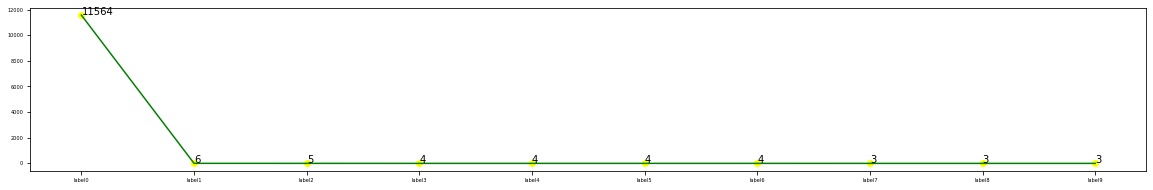

In [9]:
sizes = []
labels = 'label'
labels1 = []
for i in range(10):
    sizes.append(len(list4[i])) 
    labels = labels+str(i) 
    labels1.append(labels)
    labels = 'label'

plt.scatter(labels1,sizes,color='yellow')
plt.plot(labels1,sizes,color='green')
for i,j in zip(labels1,sizes):
    plt.text(i,j,str(j))

plt.show()

In [10]:
# G1 = nx.Graph()
 
# for i in Edges_unique:
#     a=Vertices_list.index(i[0])
#     b=Vertices_list.index(i[1])
#     Adj_Mat[a][b]=1
#     #if (len(Adj_list[a]) == 0): 
#      #  Adj_list[a].append(i[0])
#     #if (len(Adj_list[a]) > 0):
#      #  Adj_list[a].append(i[1])
#     Adj_list[a].append(i[1])
#     G1.add_edge(i[0],i[1],relation='friend')
# cliques1 = list(find_cliques(G1))  

In [11]:
path = nx.single_source_shortest_path(G,'islam',cutoff=None)   

In [12]:
G1 = nx.Graph()
for i in Edges_unique:
    a=Vertices_list.index(i[0])
    b=Vertices_list.index(i[1])
    Adj_Mat[a][b]=1
    Adj_list[a].append(i[1])
    G1.add_edge(i[0],i[1],relation='friend')
x=[len(c) for c in nx.connected_component_subgraphs(G1) if len(c) > 2]
print(x)
x.sort(reverse=True)
sizes = []
labels = 'label'
labels1 = []
for i in range(10):
    sizes.append(x[i]) 
    labels = labels+str(i) 
    labels1.append(labels)
    labels = 'label'

plt.scatter(labels1,sizes,color='red')
plt.plot(labels1,sizes,color='green')
for i,j in zip(labels1,sizes):
    plt.text(i,j,str(j))

plt.show()

AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'